   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

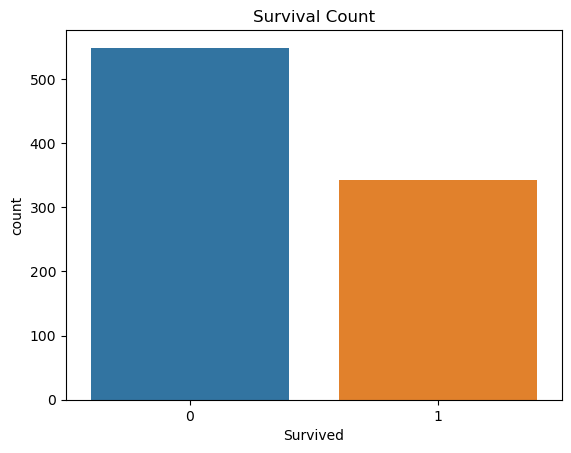

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


C:\Users\KELYN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KELYN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KELYN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


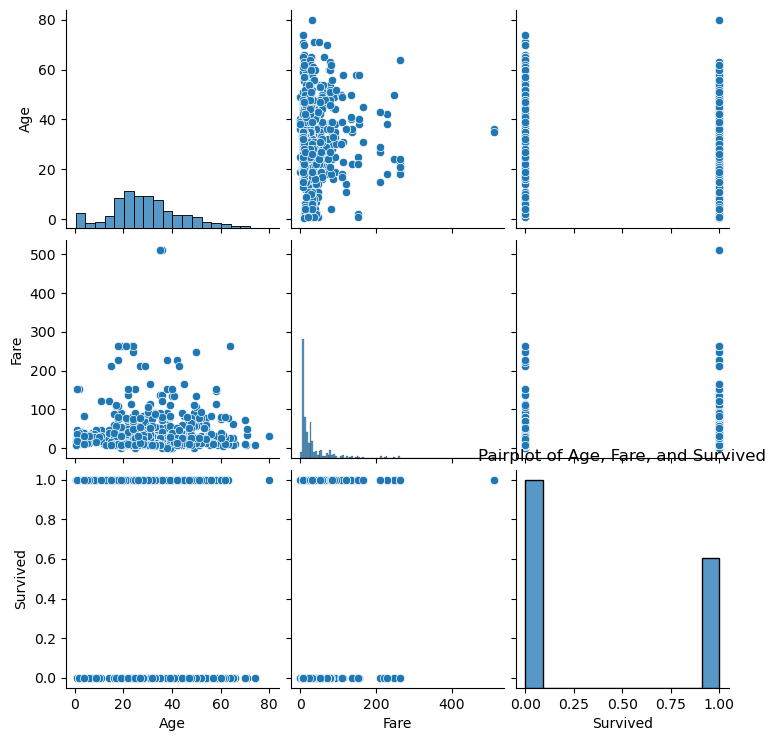

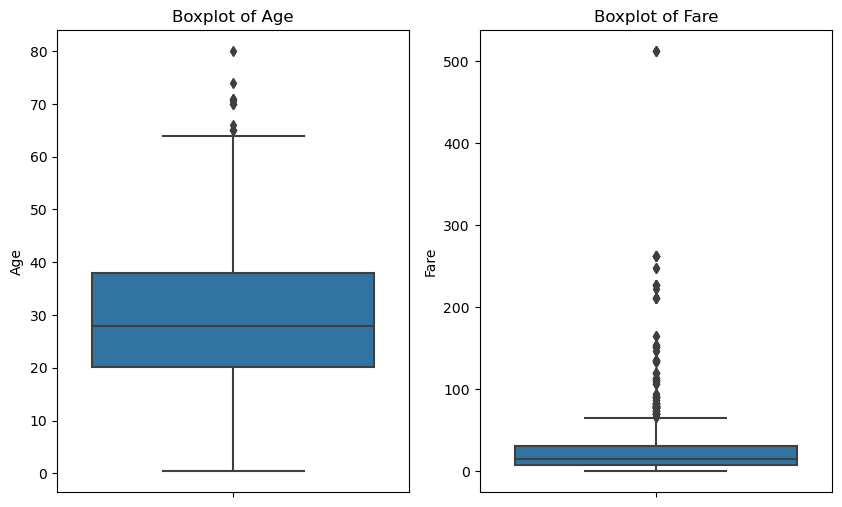

Mejores hiperparámetros: {'fit_intercept': True}
Mean Squared Error: 0.211986869082894
R2 Score: 0.10510259917193598


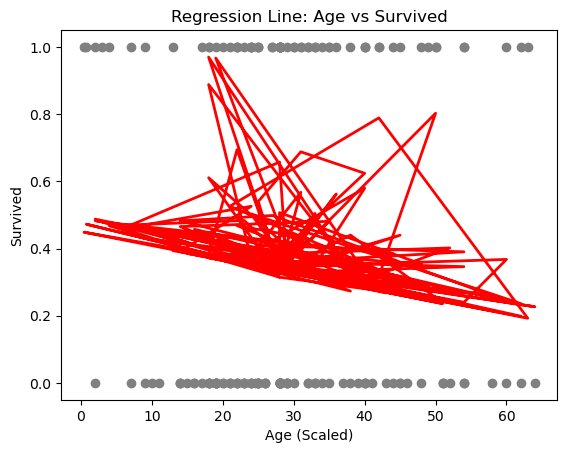

     Actual  Predicted
495       0   0.348517
648       0   0.332364
278       0   0.469646
31        1   0.657317
255       1   0.346224
298       1   0.386027
609       1   0.623929
318       1   0.687810
484       1   0.540084
367       1   0.331613


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from scipy import stats

titanic_data = pd.read_csv('Titanic-Dataset.csv')

print(titanic_data.head())
print(titanic_data.info())
print(titanic_data.describe())

sns.countplot(x='Survived', data=titanic_data)
plt.title('Survival Count')
plt.show()

print(titanic_data.isnull().sum())

sns.pairplot(titanic_data[['Age', 'Fare', 'Survived']])
plt.title('Pairplot of Age, Fare, and Survived')
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y='Age', data=titanic_data)
plt.title('Boxplot of Age')
plt.subplot(1, 2, 2)
sns.boxplot(y='Fare', data=titanic_data)
plt.title('Boxplot of Fare')
plt.show()

titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})
titanic_data['Fare'].fillna(titanic_data['Fare'].median(), inplace=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(titanic_data[['Age', 'Fare']])

z_scores = np.abs(stats.zscore(titanic_data[['Age', 'Fare']]))
titanic_data_filtered = titanic_data[(z_scores < 3).all(axis=1)]

selector = SelectKBest(score_func=f_classif, k=2)
X_selected = selector.fit_transform(titanic_data[['Age', 'Fare']], titanic_data['Survived'])

X = titanic_data[['Age', 'Fare']]
y = titanic_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=0)

regression_model = LinearRegression()

param_grid = {'fit_intercept': [True, False]}

grid_search = GridSearchCV(regression_model, param_grid, cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

print("Mejores hiperparámetros:", best_params)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

plt.scatter(X_test[:, 0], y_test, color='gray')
plt.plot(X_test[:, 0], y_pred, color='red', linewidth=2)
plt.xlabel('Age (Scaled)')
plt.ylabel('Survived')
plt.title('Regression Line: Age vs Survived')
plt.show()

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results_df.head(10))